## 使用 Swin2SR 算法缩放图片

Link：https://huggingface.co/docs/transformers/main/en/model_doc/swin2sr#transformers.Swin2SRForImageSuperResolution.forward.example

In [1]:
!pip install transformers
!pip install 'transformers[torch]'
!pip install 'transformers[tf-cpu]'
!pip install 'transformers[flax]'


[notice] A new release of pip is available: 23.0.1 -> 23.1
[notice] To update, run: python -m pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 23.1
[notice] To update, run: python -m pip install --upgrade pip
  Using cached jax-0.4.8-py3-none-any.whl
  Attempting uninstall: jax
    Found existing installation: jax 0.3.6
    Uninstalling jax-0.3.6:
      Successfully uninstalled jax-0.3.6

[notice] A new release of pip is available: 23.0.1 -> 23.1
[notice] To update, run: python -m pip install --upgrade pip
  Using cached jax-0.3.6-py3-none-any.whl
  Attempting uninstall: jax
    Found existing installation: jax 0.4.8
    Uninstalling jax-0.4.8:
      Successfully uninstalled jax-0.4.8
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.12.0 requires jax>=0.3.15, but you have jax 0.3.6 which is incompatible.
tensorflow-c

2023-04-18 05:13:13.055438: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


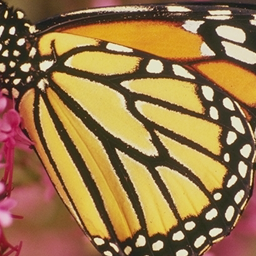

In [2]:
import torch
import numpy as np
from PIL import Image
import requests

from transformers import AutoImageProcessor, Swin2SRForImageSuperResolution

processor = AutoImageProcessor.from_pretrained("caidas/swin2SR-realworld-sr-x4-64-bsrgan-psnr")
model = Swin2SRForImageSuperResolution.from_pretrained("caidas/swin2SR-realworld-sr-x4-64-bsrgan-psnr")

url = "https://huggingface.co/spaces/jjourney1125/swin2sr/resolve/main/samples/butterfly.jpg"
image = Image.open(requests.get(url, stream=True).raw)
image

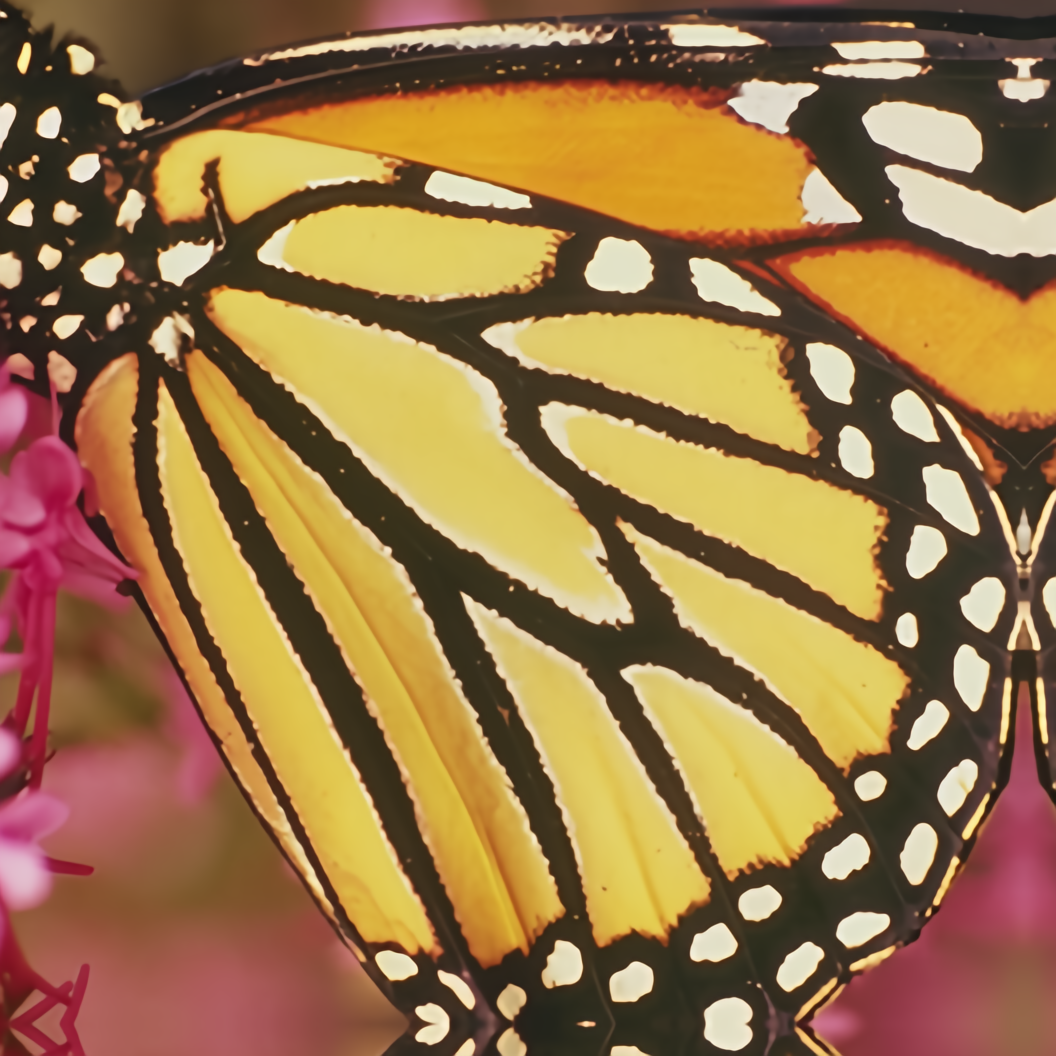

In [3]:
# prepare image for the model
inputs = processor(image, return_tensors="pt")

# forward pass
with torch.no_grad():
    outputs = model(**inputs)

output = outputs.reconstruction.data.squeeze().float().cpu().clamp_(0, 1).numpy()
output = np.moveaxis(output, source=0, destination=-1)
output = (output * 255.0).round().astype(np.uint8)  # float32 to uint8
# you can visualize `output` with `Image.fromarray`
img = Image.fromarray(output)
img